<a href="https://colab.research.google.com/github/Jkanishkha0305/Fetal-Health-prediction-using-Deep-learning-and-Machine-Learning/blob/main/Fetal_health_prediction_using_Hybrid_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetal Health Classification using Hybrid Learning techniques

1.Import Libraries

In [35]:
# Common
import os
import numpy as np

# Data 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split

# Model
from keras import Sequential
from keras.layers import Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

2.Import the Dataset

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('drive/MyDrive/Colab_Assignments/FetalHealth/fetal_health.csv')

3.EDA - Exploratory Data Analysis

In [38]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [39]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [41]:
df.shape

(2126, 22)

In [42]:
df.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


4.Feature Engineering

In [43]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

fetal_health
sort
Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

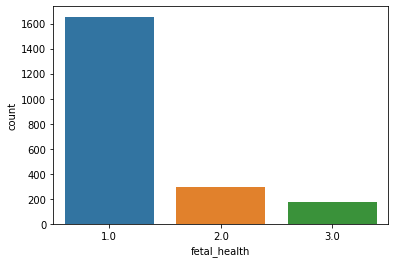

In [44]:
sns.countplot(x="fetal_health",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcedfea8210>,
      dtype=object)

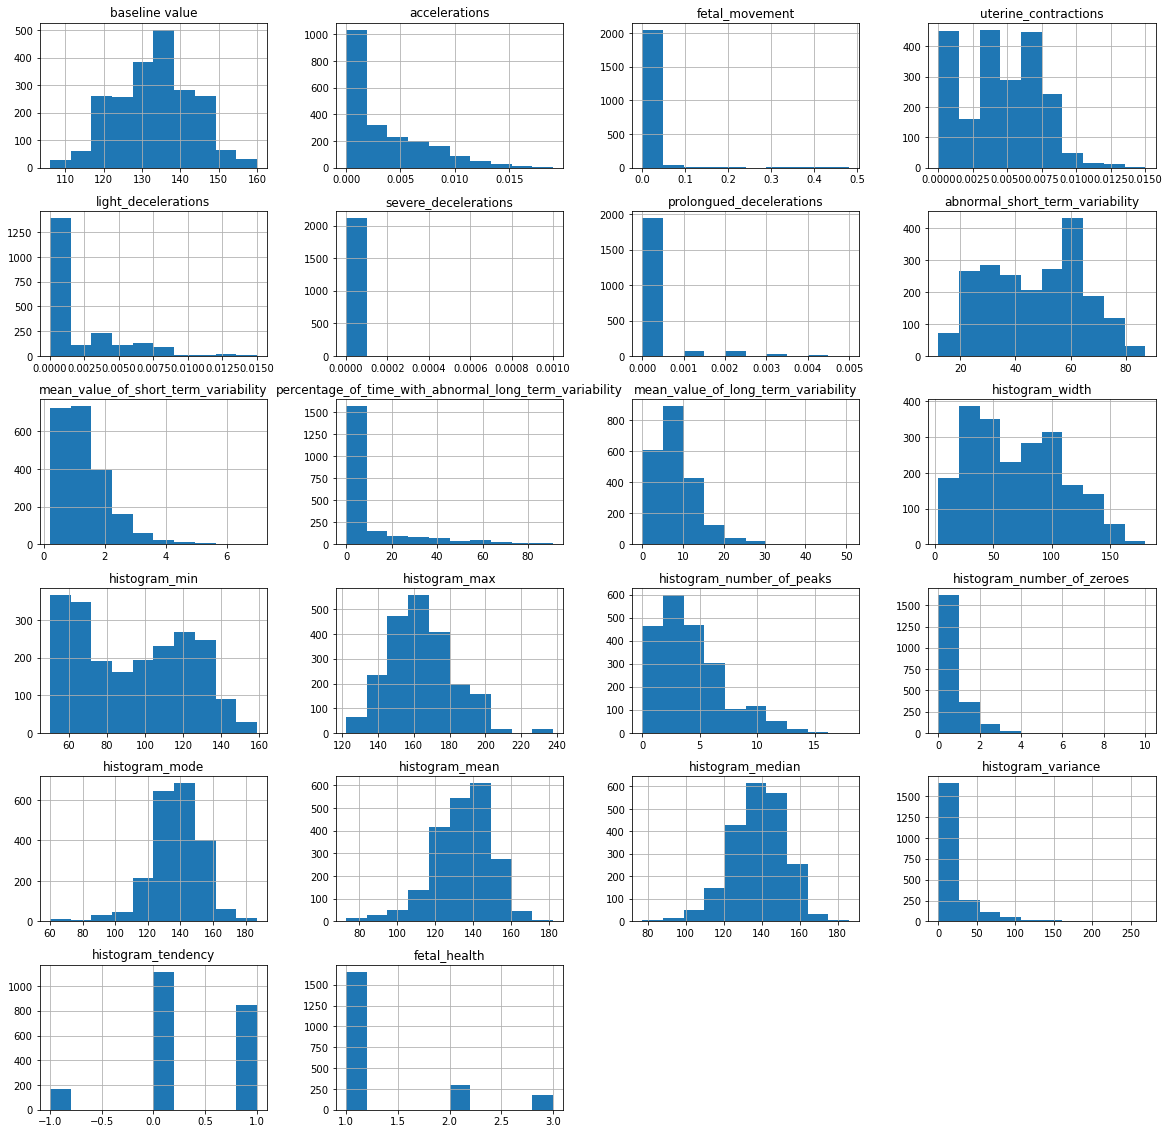

In [45]:
df.iloc[:,:].hist(figsize=[20,20], layout=[6,4])

5.Train - Test Split 

In [46]:
y = df.pop('fetal_health') - 1 # To bring values from 1-3  to 0-2
x = df

In [47]:
y.head(3)

0    1.0
1    0.0
2    0.0
Name: fetal_health, dtype: float64

In [48]:
x.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Return A Numpy Array

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=3)
for train_ids, test_ids in splitter.split(x_scaled, y):
    x_train_full, y_train_full = x_scaled[train_ids], y[train_ids]
    x_test, y_test = x_scaled[test_ids], y[test_ids]

In [51]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,stratify=y) 
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1700, 21)
(426, 21)
(1700,)
(426,)


##Models for testing

XGBoost Classifier

In [52]:
from xgboost import XGBClassifier

xb = XGBClassifier()
xb.fit(xtrain,ytrain)
y_train_pred = xb.predict(xtrain)
y_test_pred = xb.predict(xtest)

In [53]:
# Make Prediction
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions= xb.predict(xtest)
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       332
         1.0       0.89      0.80      0.84        59
         2.0       1.00      0.89      0.94        35

    accuracy                           0.95       426
   macro avg       0.95      0.89      0.92       426
weighted avg       0.95      0.95      0.95       426



Basic Machine Learning Models

MobileNet 

In [54]:
import tensorflow as tf

model = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

17225924/17225924 [==============================] - 2s 0us/step


In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

name= 'mobilenet'

#callback
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

In [57]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=15, callbacks=cbs)

Epoch 1/15


ValueError: ignored

Dense CNN Model

In [68]:
# Model
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

name = "dense1"
# Model Architecture
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    Dense(64, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
    Dropout(0.2),
    Dense(3, activation='softmax'),
], name=name)

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

# Callbacks
#cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

In [69]:
#Train the model
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50 )

Epoch 1/50
54/54 [==============================] - 1s 6ms/step - loss: 0.5747 - accuracy: 0.7894 - val_loss: 0.4621 - val_accuracy: 0.8427
Epoch 2/50
54/54 [==============================] - 0s 6ms/step - loss: 0.4254 - accuracy: 0.8376 - val_loss: 0.3866 - val_accuracy: 0.8685
Epoch 3/50
54/54 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.8453 - val_loss: 0.4012 - val_accuracy: 0.8592
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8471 - val_loss: 0.3707 - val_accuracy: 0.8732
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8412 - val_loss: 0.4469 - val_accuracy: 0.8427
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8500 - val_loss: 0.3644 - val_accuracy: 0.8638
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8541 - val_loss: 0.3664 - val_accuracy: 0.8709
Epoch 8/50
54/54 [==

In [71]:
#Test
model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8991


[0.31498876214027405, 0.8990610241889954]

In [72]:
# Make Prediction
pred = np.argmax(model.predict(xtest), axis=1)
print(classification_report(ytest, pred))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       332
         1.0       0.74      0.58      0.65        59
         2.0       0.93      0.80      0.86        35

    accuracy                           0.90       426
   macro avg       0.86      0.78      0.82       426
weighted avg       0.89      0.90      0.89       426



Creating the Hybrid Learning Model

In [103]:
# Part 2 - Building the MLP + SVM
nn = tf.keras.models.Sequential()

#5 layers 
nn.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer='random_normal'))
#nn.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer='random_normal'))
nn.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='random_normal'))
#nn.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='random_normal'))
nn.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='random_normal'))

nn.add(tf.keras.layers.Dropout(0.2))
nn.add(tf.keras.layers.Flatten())

#Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Multi Class Classification
nn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))


In [104]:
nn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

Train the Model

In [106]:
nn.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=50 )

Epoch 1/50
54/54 [==============================] - 0s 5ms/step - loss: 0.8899 - accuracy: 0.7782 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.9109 - accuracy: 0.7782 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.9022 - accuracy: 0.7765 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.8642 - accuracy: 0.7724 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 0.9008 - accuracy: 0.7782 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.8972 - accuracy: 0.7718 - val_loss: 1.0052 - val_accuracy: 0.7793
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.8620 - accuracy: 0.7776 - val_loss: 1.0052 - val_accuracy: 0.7160
Epoch 8/50
54/54 [==

Test the Model

In [107]:
nn.evaluate(xtest, ytest)

14/14 [==============================] - 0s 3ms/step - loss: 1.0052 - accuracy: 0.7793


[1.0052164793014526, 0.7793427109718323]

Evaluation Metrics

In [108]:
pred = np.argmax(nn.predict(xtest), axis=1)
print(classification_report(ytest, pred))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       332
         1.0       0.00      0.00      0.00        59
         2.0       0.00      0.00      0.00        35

    accuracy                           0.78       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.61      0.78      0.68       426



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Save the Model 